In [5]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [8]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [10]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [11]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [12]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=1)

In [15]:
x_train

,Pclass,Age,Fare,female,male
301,3,29.699118,23.2500,0,1
309,1,30.000000,56.9292,1,0
516,2,34.000000,10.5000,1,0
120,2,21.000000,73.5000,0,1
570,2,62.000000,10.5000,0,1
...,...,...,...,...,...
715,3,19.000000,7.6500,0,1
767,3,30.500000,7.7500,1,0
72,2,21.000000,73.5000,0,1
235,3,29.699118,7.5500,1,0


In [16]:
len(x_train)

712

In [17]:
x_test

,Pclass,Age,Fare,female,male
862,1,48.000000,25.9292,1,0
223,3,29.699118,7.8958,0,1
84,2,17.000000,10.5000,1,0
680,3,29.699118,8.1375,1,0
535,2,7.000000,26.2500,1,0
...,...,...,...,...,...
796,1,49.000000,25.9292,1,0
815,1,29.699118,0.0000,0,1
629,3,29.699118,7.7333,0,1
421,3,21.000000,7.7333,0,1


In [18]:
len(x_test)

179

In [19]:
y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [20]:
len(y_train)

712

In [21]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [22]:
len(y_test)

179

# Apply Gaussian Naive Baye's

In [23]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()

In [24]:
clf.fit(x_train,y_train)

GaussianNB()

In [25]:
clf.score(x_test,y_test)

0.776536312849162

In [26]:
x_test[:10]

,Pclass,Age,Fare,female,male
862,1,48.000000,25.9292,1,0
223,3,29.699118,7.8958,0,1
84,2,17.000000,10.5000,1,0
680,3,29.699118,8.1375,1,0
535,2,7.000000,26.2500,1,0
623,3,21.000000,7.8542,0,1
148,2,36.500000,26.0000,0,1
3,1,35.000000,53.1000,1,0
34,1,28.000000,82.1708,0,1
241,3,29.699118,15.5000,1,0


In [27]:
clf.predict(x_test[:10])

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [28]:
clf.predict_proba(x_test[:10])

array([[0.00641471, 0.99358529],
       [0.99055747, 0.00944253],
       [0.02162335, 0.97837665],
       [0.06341096, 0.93658904],
       [0.01375034, 0.98624966],
       [0.98907735, 0.01092265],
       [0.97689823, 0.02310177],
       [0.00437148, 0.99562852],
       [0.69151423, 0.30848577],
       [0.06308945, 0.93691055]])

In [29]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [30]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [31]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179



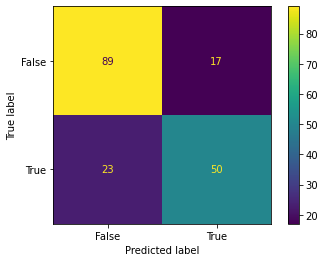

In [32]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [33]:
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[89, 17],
       [23, 50]], dtype=int64)

In [34]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fp,fn,tp

(89, 17, 23, 50)

In [32]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.776536312849162

In [53]:
precision=metrics.precision_score(y_test,predict)
precision

0.7301587301587301

In [ ]:
recall=metrics.recall_score(y_test,predict)
recall

In [ ]:
f1_score=metrics.f1_score(y_test,predict)
f1_score

# Apply Bernoulli Naive Baye's

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
predict=clf.predict(x_test)
predict

In [ ]:
#accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

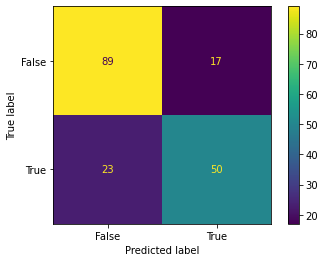

In [34]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [35]:
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[89, 17],
       [23, 50]], dtype=int64)

In [36]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fp,fn,tp

(89, 17, 23, 50)

In [37]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.776536312849162

In [38]:
precison=metrics.precision_score(y_test,predict)
precison

0.746268656716418

In [39]:
recall=metrics.recall_score(y_test,predict)
recall

0.684931506849315

In [40]:
f1_score=metrics.recall_score(y_test,predict)
f1_score

0.684931506849315

# Apply Multinomial Naive Baye's

In [41]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [42]:
predict=clf.predict(x_test)
predict

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [43]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       106
           1       0.60      0.42      0.50        73

    accuracy                           0.65       179
   macro avg       0.63      0.61      0.61       179
weighted avg       0.64      0.65      0.63       179



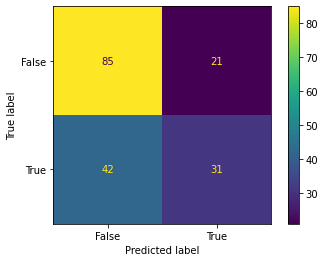

In [44]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [45]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fp,fn,tp

(85, 21, 42, 31)

In [46]:
accurary=metrics.accuracy_score(y_test,predict)
accuracy

0.776536312849162

In [47]:
precision=metrics.precision_score(y_test,predict)
precision

0.5961538461538461

In [48]:
recall=metrics.recall_score(y_test,predict)
recall

0.4246575342465753

In [49]:
f1_score=metrics.f1_score(y_test,predict)
f1_score

0.4959999999999999

# DECISION TREE CLASSIFIER

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=1)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [51]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [52]:
#confusion-matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       106
           1       0.74      0.62      0.67        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [53]:
#confusion matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predict)
cm

array([[90, 16],
       [28, 45]], dtype=int64)

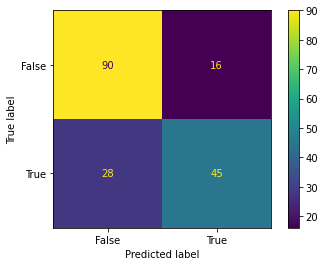

In [54]:
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [55]:
tn,fn,fp,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fn,fp,tp

(90, 16, 28, 45)

In [56]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.7541899441340782

In [57]:
precision=metrics.precision_score(y_test,predict)
precision

0.7377049180327869

In [58]:
recall=metrics.recall_score(y_test,predict)
recall

0.6164383561643836

In [59]:
f1_score=metrics.f1_score(y_test,predict)
f1_score

0.6716417910447762

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [61]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [62]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



In [63]:
#confusion matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[90, 16],
       [24, 49]], dtype=int64)

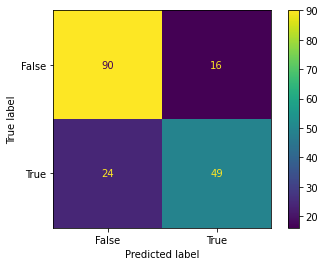

In [64]:
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [65]:
tn,fn,fp,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fn,fp,tp

(90, 16, 24, 49)

In [66]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.776536312849162

In [67]:
precision=metrics.precision_score(y_test,predict)
precision

0.7538461538461538

In [68]:
recall=metrics.recall_score(y_test,predict)
print(recall)
recall*100

0.6712328767123288


67.12328767123287

In [35]:
f1_score=metrics.f1_score(y_test,predict)
print(f1_score)
f1_score*100

0.7142857142857143


71.42857142857143

In [36]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier(criterion='gini',random_state=0)
cls.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
predict=cls.predict(x_test)
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [38]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       106
           1       0.73      0.63      0.68        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



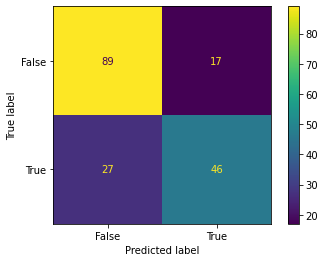

In [41]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [42]:
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[89, 17],
       [27, 46]], dtype=int64)

In [43]:
tn,fn,fp,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fn,fp,tp

(89, 17, 27, 46)

In [46]:
accuracy=metrics.accuracy_score(y_test,predict)
print(accuracy)
accuracy*100

0.7541899441340782


75.41899441340783

In [47]:
precision=metrics.precision_score(y_test,predict)
print(precision)
precision*100

0.7301587301587301


73.01587301587301

In [48]:
recall=metrics.precision_score(y_test,predict)
print(recall)
recall*100

0.7301587301587301


73.01587301587301

In [50]:
f1_score=metrics.f1_score(y_test,predict)
print(f1_score)
f1_score*100

0.6764705882352942


67.64705882352942

# SUPPORT VECTOR MACHINE

In [72]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [73]:
predict=clf.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [74]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       106
           1       0.65      0.30      0.41        73

    accuracy                           0.65       179
   macro avg       0.65      0.59      0.58       179
weighted avg       0.65      0.65      0.61       179



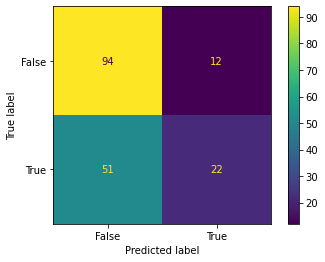

In [75]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [76]:
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[94, 12],
       [51, 22]], dtype=int64)

In [78]:
tn,fn,fp,tp=metrics.confusion_matrix(y_test,predict).ravel()
tn,fn,fp,tp

(94, 12, 51, 22)

In [79]:
accuracy=metrics.accuracy_score(y_test,predict)
print(accuracy)
accuracy*100

0.6480446927374302


64.80446927374301

In [81]:
precision=metrics.precision_score(y_test,predict)
print(precision)
precision*100

0.6470588235294118


64.70588235294117

In [82]:
recall=metrics.recall_score(y_test,predict)
print(recall)
recall*100

0.3013698630136986


30.136986301369863

In [84]:
f1_score=metrics.f1_score(y_test,predict)
print(f1_score)
f1_score*100

0.411214953271028


41.1214953271028

In [96]:
from sklearn.svm import SVC
cls=SVC(kernel='linear',random_state=1)
cls.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

In [97]:
predict=cls.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [98]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



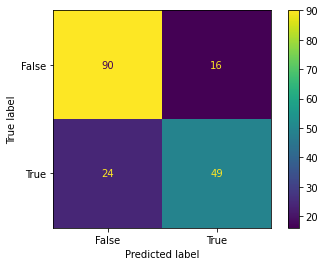

In [99]:
#confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()

In [100]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[90, 16],
       [24, 49]], dtype=int64)

In [101]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.776536312849162

In [54]:
from sklearn.svm import SVC
cls=SVC(kernel='rbf',random_state=1) #gamma=15,c=7
cls.fit(x_train,y_train)

SVC(random_state=1)

In [57]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179



In [60]:
confusion_matrix(y_test,predict)

array([[89, 17],
       [23, 50]], dtype=int64)

In [69]:
accuracy=metrics.accuracy_score(y_test,predict)
print(accuracy)
accuracy*100

0.776536312849162


77.6536312849162

In [71]:
from sklearn.svm import SVC
cls=SVC(kernel='poly',random_state=1)
cls.fit(x_train,y_train)

SVC(kernel='poly', random_state=1)

In [72]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [73]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       106
           1       0.75      0.68      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.77      0.78      0.77       179



In [74]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[89, 17],
       [23, 50]], dtype=int64)

In [76]:
accuaracy=metrics.accuracy_score(y_test,predict)
accuaracy

0.776536312849162

In [77]:
from sklearn.svm import SVC
cls=SVC(kernel='sigmoid',random_state=1)
cls.fit(x_train,y_train)

SVC(kernel='sigmoid', random_state=1)

In [78]:
predict=cls.predict(x_test)
predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       106
           1       0.51      0.49      0.50        73

    accuracy                           0.60       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.60      0.60      0.60       179



In [80]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[72, 34],
       [37, 36]], dtype=int64)

In [81]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.6033519553072626

# Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_jobs=2,random_state=0)
cls.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [85]:
predict=cls.predict(x_test)
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [86]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       106
           1       0.85      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [87]:
#confusion matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[98,  8],
       [27, 46]], dtype=int64)

In [88]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.8044692737430168

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=2,criterion='entropy',random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=0)

In [91]:
predict=clf.predict(x_test)
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [92]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       106
           1       0.84      0.66      0.74        73

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [93]:
#confusion matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[97,  9],
       [25, 48]], dtype=int64)

In [95]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.8100558659217877

In [102]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_jobs=5,criterion='gini',random_state=0)
cls.fit(x_train,y_train)

RandomForestClassifier(n_jobs=5, random_state=0)

In [103]:
predict=cls.predict(x_test)
predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [104]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       106
           1       0.85      0.63      0.72        73

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [105]:
#confusion matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predict)
confusion_matrix

array([[98,  8],
       [27, 46]], dtype=int64)

In [106]:
accuracy=metrics.accuracy_score(y_test,predict)
accuracy

0.8044692737430168